In [1]:
%matplotlib inline
import numpy as np
import sklearn.model_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.utils
import os
from tqdm import tqdm
import pandas as pd

from skimage.util.shape import view_as_windows

import warnings
import matplotlib.pyplot as plt

In [2]:
def df_to_feat_idx(feat_df, key, fun):
    # take only samples of the key feature over the rms threshold
    X = feat_df.apply(lambda x: np.asarray(x[key]).squeeze().T[np.where(x['rms_idx'] == 1)].T, axis=1)
    # apply the function
    X = X.apply(fun)
    X = X.apply(lambda x: np.reshape(x, (1, -1)))
    X = np.concatenate(X).squeeze()
    if len(X.shape) == 1:
        X.shape += (1,)
    return X

## Retrieve models, RAI features and annotation

In [3]:
import pickle
pkl_filename = '../models/win_cl.pkl'
with open(pkl_filename, 'rb') as file:  
    cl = pickle.load(file)

pkl_filename = '../models/rai_mcl.pkl'
with open(pkl_filename, 'rb') as file:  
    mcl = pickle.load(file)
    
pkl_filename = '../models/win_r.pkl'
with open(pkl_filename, 'rb') as file:  
    r = pickle.load(file)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.21.2 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVR from version 0.21.2 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
res_file_name = 'rai_features.pkl'
feat_df = pd.read_pickle(os.path.join('../notebook/pickle/', res_file_name))

## Test on RAI

In [5]:
# we can't filter outliers
filter_outliers = False
win_min_max = True
rms_th = 0.25
norm = 'zscore'
alg = 'svm'
n_win_min = 20
n_win_max = 250


# Shuffle the dataset
feat_df = sklearn.utils.shuffle(feat_df, random_state=0).reset_index(drop=True)

# Apply rms threshold
feat_df['rms_idx'] = feat_df['rms'].apply(lambda x: x >= rms_th * (x.max() - x.min()) + x.min())
feat_df['n_win'] = feat_df['rms'].apply(lambda x: len(x))

if win_min_max:
    feat_df = feat_df.loc[np.where(np.logical_and(feat_df['n_win'] >= n_win_min, feat_df['n_win'] <= n_win_max))[0]].reset_index()

In [6]:
feat_df

,index,path,noise,snr,mfcc,sfl,sc,sroff,zcr,rms,y_value,y_label,y_bin_label,rms_idx,n_win
0,6,/nas/home/cborrelli/speech_forensics/rai/singl...,rai,None,"[[[-289.9055525176381, -277.4365498372447, -26...","[0.0031730114, 0.0028760987, 0.005617912, 0.00...","[1031.3074372421213, 1369.1250156877709, 2066....","[2060.0, 2700.0, 3900.0, 3920.0, 3580.0, 2320....","[0.02125, 0.08, 0.14125, 0.145, 0.10875, 0.076...","[0.06975404, 0.07919425, 0.08075802, 0.0747717...",None,2,1,"[True, True, True, True, True, True, False, Fa...",82
1,14,/nas/home/cborrelli/speech_forensics/rai/multi...,rai,None,"[[[-217.50610706105678, -256.03373805724374, -...","[0.045875702, 0.06130067, 0.19012932, 0.051379...","[2105.428414865237, 2304.001166343801, 3393.50...","[4340.0, 5220.0, 6480.0, 4880.0, 3740.0, 4260....","[0.0575, 0.20125, 0.295, 0.20375, 0.15875, 0.1...","[0.046975974, 0.037978027, 0.020436542, 0.0143...",None,0,0,"[True, False, False, False, False, True, True,...",242
2,15,/nas/home/cborrelli/speech_forensics/rai/singl...,rai,None,"[[[-314.8951071534179, -350.6631450194468, -30...","[0.0007552989, 0.013037205, 0.14026506, 0.1163...","[840.2597270227136, 1403.8814646267383, 3107.3...","[980.0, 3180.0, 6480.0, 6820.0, 6220.0, 4520.0...","[0.0325, 0.1225, 0.19125, 0.3075, 0.29875, 0.1...","[0.060611393, 0.043817487, 0.019372959, 0.0201...",None,2,1,"[True, True, False, False, False, False, False...",152
3,16,/nas/home/cborrelli/speech_forensics/rai/singl...,rai,None,"[[[-309.89351834575865, -272.36192736448726, -...","[0.015061114, 0.00758172, 0.0034260852, 0.0025...","[1545.7644651260398, 1443.393183149617, 1538.1...","[2940.0, 2240.0, 2400.0, 2500.0, 2420.0, 2640....","[0.055, 0.10375, 0.11375, 0.11625, 0.09375, 0....","[0.030214325, 0.050239608, 0.06279419, 0.05445...",None,2,1,"[True, True, True, True, True, False, False, F...",61
4,28,/nas/home/cborrelli/speech_forensics/rai/singl...,rai,None,"[[[-227.3662581450796, -245.20680940566066, -2...","[0.012909374, 0.0128091965, 0.014589618, 0.027...","[1765.6950453427635, 1818.053135277013, 1721.2...","[2960.0, 2900.0, 2740.0, 2980.0, 5780.0, 6380....","[0.085, 0.1775, 0.19125, 0.21375, 0.305, 0.455...","[0.05376585, 0.048485838, 0.033407085, 0.01708...",None,2,1,"[True, True, True, False, False, False, False,...",100
5,31,/nas/home/cborrelli/speech_forensics/rai/singl...,rai,None,"[[[-348.2536834316437, -329.79538612757045, -3...","[0.009350835, 0.0032697632, 0.0036649117, 0.03...","[1640.4376609921997, 1558.15565887747, 1645.80...","[2880.0, 2780.0, 2800.0, 3520.0, 3700.0, 3420....","[0.06125, 0.08625, 0.10875, 0.1775, 0.21625, 0...","[0.03734916, 0.051832676, 0.05726106, 0.039734...",None,2,1,"[True, True, True, True, False, True, True, Tr...",244
6,32,/nas/home/cborrelli/speech_forensics/rai/multi...,rai,None,"[[[-394.9075912018415, -335.59845437471665, -3...","[0.01450623, 0.07180498, 0.060705833, 0.006296...","[1588.684483471252, 2285.725134163913, 2099.51...","[2980.0, 4500.0, 4440.0, 1780.0, 2140.0, 2480....","[0.0675, 0.1475, 0.14375, 0.11375, 0.1075, 0.1...","[0.0106704375, 0.014428257, 0.03048284, 0.0776...",None,0,0,"[False, False, False, True, True, True, True, ...",163
7,36,/nas/home/cborrelli/speech_forensics/rai/multi...,rai,None,"[[[-223.0885601850376, -269.9485674573764, -30...","[0.021014202, 0.013253179, 0.01921952, 0.00859...","[1821.0392488293837, 1599.9143931566755, 2185....","[3640.0, 3020.0, 4120.0, 4140.0, 3980.0, 5220....","[0.06, 0.1325, 0.2075, 0.2575, 0.21875, 0.2362...","[0.057243977, 0.04443243, 0.031641234, 0.03680...",None,1,0,"[True, True, False, True, False, False, False,...",128
8,37,/nas/home/cborrelli/speech_forensics/rai/singl...,rai,None,"[[[-292.7551839485626, -287.33166206383646, -2...","[0.0042960565, 0.006945784, 0.0066735297, 0.01...","[1356.217713906609, 1496.067098654122, 1386.05...","[2420.0, 3080.0, 2400.0, 3860.0, 6560.0, 6840....","[0.05625, 0.105, 0.09375, 0.185, 0.44125, 0.59...","[0.036249448, 0.039272033, 0.038694575, 0.0276...",None,2,1,

In [7]:
# Compute feature matrix
key_list = ['mfcc', 'sfl', 'sc', 'sroff', 'zcr', 'rms']

X_mean_list = []
for key in key_list:
    X_mean_list += [df_to_feat_idx(feat_df, key, lambda x: np.mean(x, axis=-1))]
X_mean = np.concatenate(X_mean_list, axis=1)

X_std_list = []
for key in key_list:
    X_std_list += [df_to_feat_idx(feat_df, key, lambda x: np.std(x, axis=-1))]
X_std = np.concatenate(X_std_list, axis=1)

X_max_list = []
for key in key_list:
    X_max_list += [df_to_feat_idx(feat_df, key, lambda x: np.max(x, axis=-1))]
X_max = np.concatenate(X_max_list, axis=1)

X_min_list = []
for key in key_list:
    X_min_list += [df_to_feat_idx(feat_df, key, lambda x: np.min(x, axis=-1))]
X_min = np.concatenate(X_min_list, axis=1)


X = np.concatenate([X_mean, X_std, X_max, X_min], axis=1)


In [8]:
# Retrieve labels
y_mcl = np.array(feat_df['y_label'], dtype=np.float)  # labels for classification
y_cl = np.array(feat_df['y_bin_label'], dtype=np.float)


# Normalize features
if norm == 'zscore':
    X_norm = (X - X.mean(axis=0)) / X.std(axis=0)  # z-score
elif norm == 'minmax':
    X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  # [0, 1]
else:
    X_norm = X

# Remove nan and inf
X_norm[np.where(np.isnan(X_norm))] = 0
X_norm[np.where(np.isinf(X_norm))] = 0

In [9]:
print('min(X_norm) = {:.3f}'.format(X_norm.min()))
print('max(X_norm) = {:.3f}'.format(X_norm.max()))
print('mean(X_norm) = {:.3f}'.format(X_norm.mean()))
print('std(X_norm) = {:.3f}'.format(X_norm.std()))

min(X_norm) = -3.833
max(X_norm) = 7.699
mean(X_norm) = -0.000
std(X_norm) = 1.000


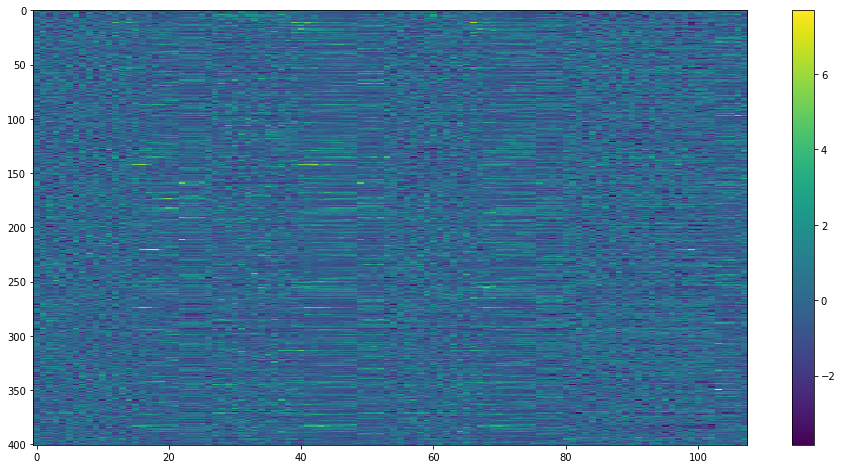

In [10]:
X_norm_single = X_norm[y_cl==1]
plt.figure(figsize=(16, 8))
plt.imshow(X_norm, aspect='auto')
plt.colorbar()

In [20]:
# Test
y_pred_cl = cl.predict(X_norm)
y_pred_mcl = mcl.predict(X_norm)
y_pred_r = r.predict(X_norm)

# Use the regression results for binary classification (single vs multiple)

bins = [0.33, 0.66, 1]
y_pred_r_mcl = np.array(np.digitize(y_pred_r, bins), dtype=np.float)

bins = [0.33, 0.66, 1]
y_pred_r_mcl = np.array(np.digitize(y_pred_r, bins), dtype=np.float)

In [23]:
mcl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_mcl, y_pred_mcl)
mcl_f1 = sklearn.metrics.f1_score(y_mcl, y_pred_mcl, average='micro')

r_mcl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_mcl, y_pred_r_mcl)
r_mcl_f1 = sklearn.metrics.f1_score(y_mcl, y_pred_r_mcl, average='micro')

r_cl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_cl, y_pred_r_cl)
r_cl_f1 = sklearn.metrics.f1_score(y_mcl, y_pred_r_cl, average='micro')


cl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_cl, y_pred_cl)
cl_f1 = sklearn.metrics.f1_score(y_cl, y_pred_cl, average='micro')

r_r2 = sklearn.metrics.r2_score(y_cl, y_pred_r)

print(r_r2)


print(mcl_balanced_accuracy)
print(mcl_f1)

print(r_mcl_balanced_accuracy)
print(r_mcl_f1)

print(cl_balanced_accuracy)
print(cl_f1)


0.2914700758908769
0.5436377348142054
0.5835411471321695
0.5025366790072672
0.4488778054862843
0.7649446958270487
0.7755610972568578


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


NameError: name 'y_pred_cl' is not defined

In [14]:
y_mcl

array([2., 0., 2., 2., 2., 2., 0., 1., 2., 0., 2., 2., 2., 1., 2., 1., 2.,
       0., 2., 2., 2., 0., 0., 2., 1., 2., 0., 0., 2., 0., 0., 2., 0., 0.,
       2., 2., 0., 0., 0., 0., 2., 1., 2., 2., 1., 0., 2., 0., 1., 0., 0.,
       2., 2., 0., 2., 2., 2., 2., 2., 1., 2., 0., 2., 2., 0., 0., 0., 2.,
       2., 2., 2., 0., 0., 2., 2., 2., 2., 1., 0., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 0., 2., 0., 0., 2., 2., 0., 2., 2., 0., 2., 0., 2., 0.,
       2., 2., 2., 2., 2., 0., 2., 1., 0., 0., 2., 0., 2., 2., 0., 2., 2.,
       1., 0., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 2., 0., 0., 2., 2.,
       2., 0., 2., 1., 2., 2., 2., 2., 2., 1., 0., 0., 2., 1., 2., 2., 0.,
       2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 0., 2., 1., 0., 0., 2., 0.,
       2., 2., 2., 2., 2., 2., 1., 2., 0., 2., 0., 2., 2., 0., 2., 0., 2.,
       0., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 1., 2.,
       1., 0., 2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 1., 2., 0., 0., 2.,
       0., 2., 1., 2., 2.

In [15]:
len(y_mcl)

401